# Machine Learning in Python - Group Project 1

**Due Friday, March 10th by 16.00 pm.**

*include contributors names here (such as Name1, Name2, ...)*

## General Setup

In [1]:
# Add any additional libraries or submodules below

# Data libraries
import numpy as np
import pandas as pd

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

# sklearn modules that are necessary
import sklearn

In [3]:
# Load data
data = pd.read_csv("the_office.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        186 non-null    int64  
 1   episode       186 non-null    int64  
 2   episode_name  186 non-null    object 
 3   director      186 non-null    object 
 4   writer        186 non-null    object 
 5   imdb_rating   186 non-null    float64
 6   total_votes   186 non-null    int64  
 7   air_date      186 non-null    object 
 8   n_lines       186 non-null    int64  
 9   n_directions  186 non-null    int64  
 10  n_words       186 non-null    int64  
 11  n_speak_char  186 non-null    int64  
 12  main_chars    186 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 19.0+ KB


After making sure that all the necessary libraries or submodules are uploaded here, please follow the given skeleton to create your project report. 
- Your completed assignment must follow this structure 
- You should not add or remove any of these sections, if you feel it is necessary you may add extra subsections within each (such as *2.1. Encoding*). 

**Do not forget to remove the instructions for each section in the final document.**

## 1. Introduction

*This section should include a brief introduction to the task and the data (assume this is a report you are delivering to a client).* 

- If you use any additional data sources, you should introduce them here and discuss why they were included.

- Briefly outline the approaches being used and the conclusions that you are able to draw.

## 2. Exploratory Data Analysis and Feature Engineering

*Include a detailed discussion of the data with a particular emphasis on the features of the data that are relevant for the subsequent modeling.* 

- Including visualizations of the data is strongly encouraged - all code and plots must also be described in the write up. 
- Think carefully about whether each plot needs to be included in your final draft - your report should include figures but they should be as focused and impactful as possible.

*Additionally, this section should also implement and describe any preprocessing / feature engineering of the data.*

- Specifically, this should be any code that you use to generate new columns in the data frame `d`. All of this processing is explicitly meant to occur before we split the data in to training and testing subsets. 
- Processing that will be performed as part of an sklearn pipeline can be mentioned here but should be implemented in the following section.*

**All code and figures should be accompanied by text that provides an overview / context to what is being done or presented.**

In [4]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data,
                                         test_size = 0.2,
                                         random_state = 42,
                                         shuffle = True)

numeric_train_data = train_data.copy()
numeric_train_data = numeric_train_data[['imdb_rating','season','episode','total_votes','n_lines','n_directions','n_words','n_speak_char']]
numeric_test_data = test_data.copy()
numeric_test_data = numeric_test_data[['imdb_rating','season','episode','total_votes','n_lines','n_directions','n_words','n_speak_char']]

output = 'imdb_rating'
y_train = numeric_train_data[[output]]
x_train = numeric_train_data.drop(output,axis=1)
y_test = numeric_test_data[[output]]
x_test = numeric_test_data.drop(output,axis=1)
print(x_train)

     season  episode  total_votes  n_lines  n_directions  n_words  \
123       7        9         1598      307            51     3162   
135       7       22         5749      329           135     3483   
150       8       12         1612      273            62     2552   
31        3        4         2311      236            52     2737   
12        2        7         2631      254            46     2445   
..      ...      ...          ...      ...           ...      ...   
106       6       17         1750      625            53     5950   
14        2        9         2527      275            39     2585   
92        6        2         1755      268            37     3192   
179       9       17         1656      218            61     2451   
102       6       13         1844      334            70     2962   

     n_speak_char  
123            26  
135            25  
150            20  
31             19  
12             14  
..            ...  
106            27  
14         

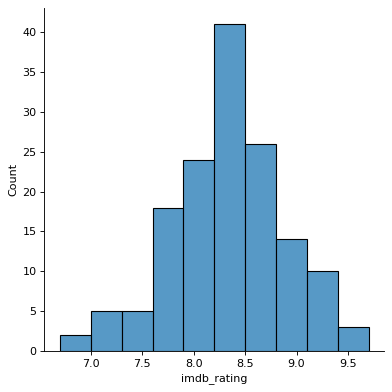

In [5]:
import seaborn as sns
sns.displot(data=numeric_train_data,x='imdb_rating',kind='hist')
plt.show()

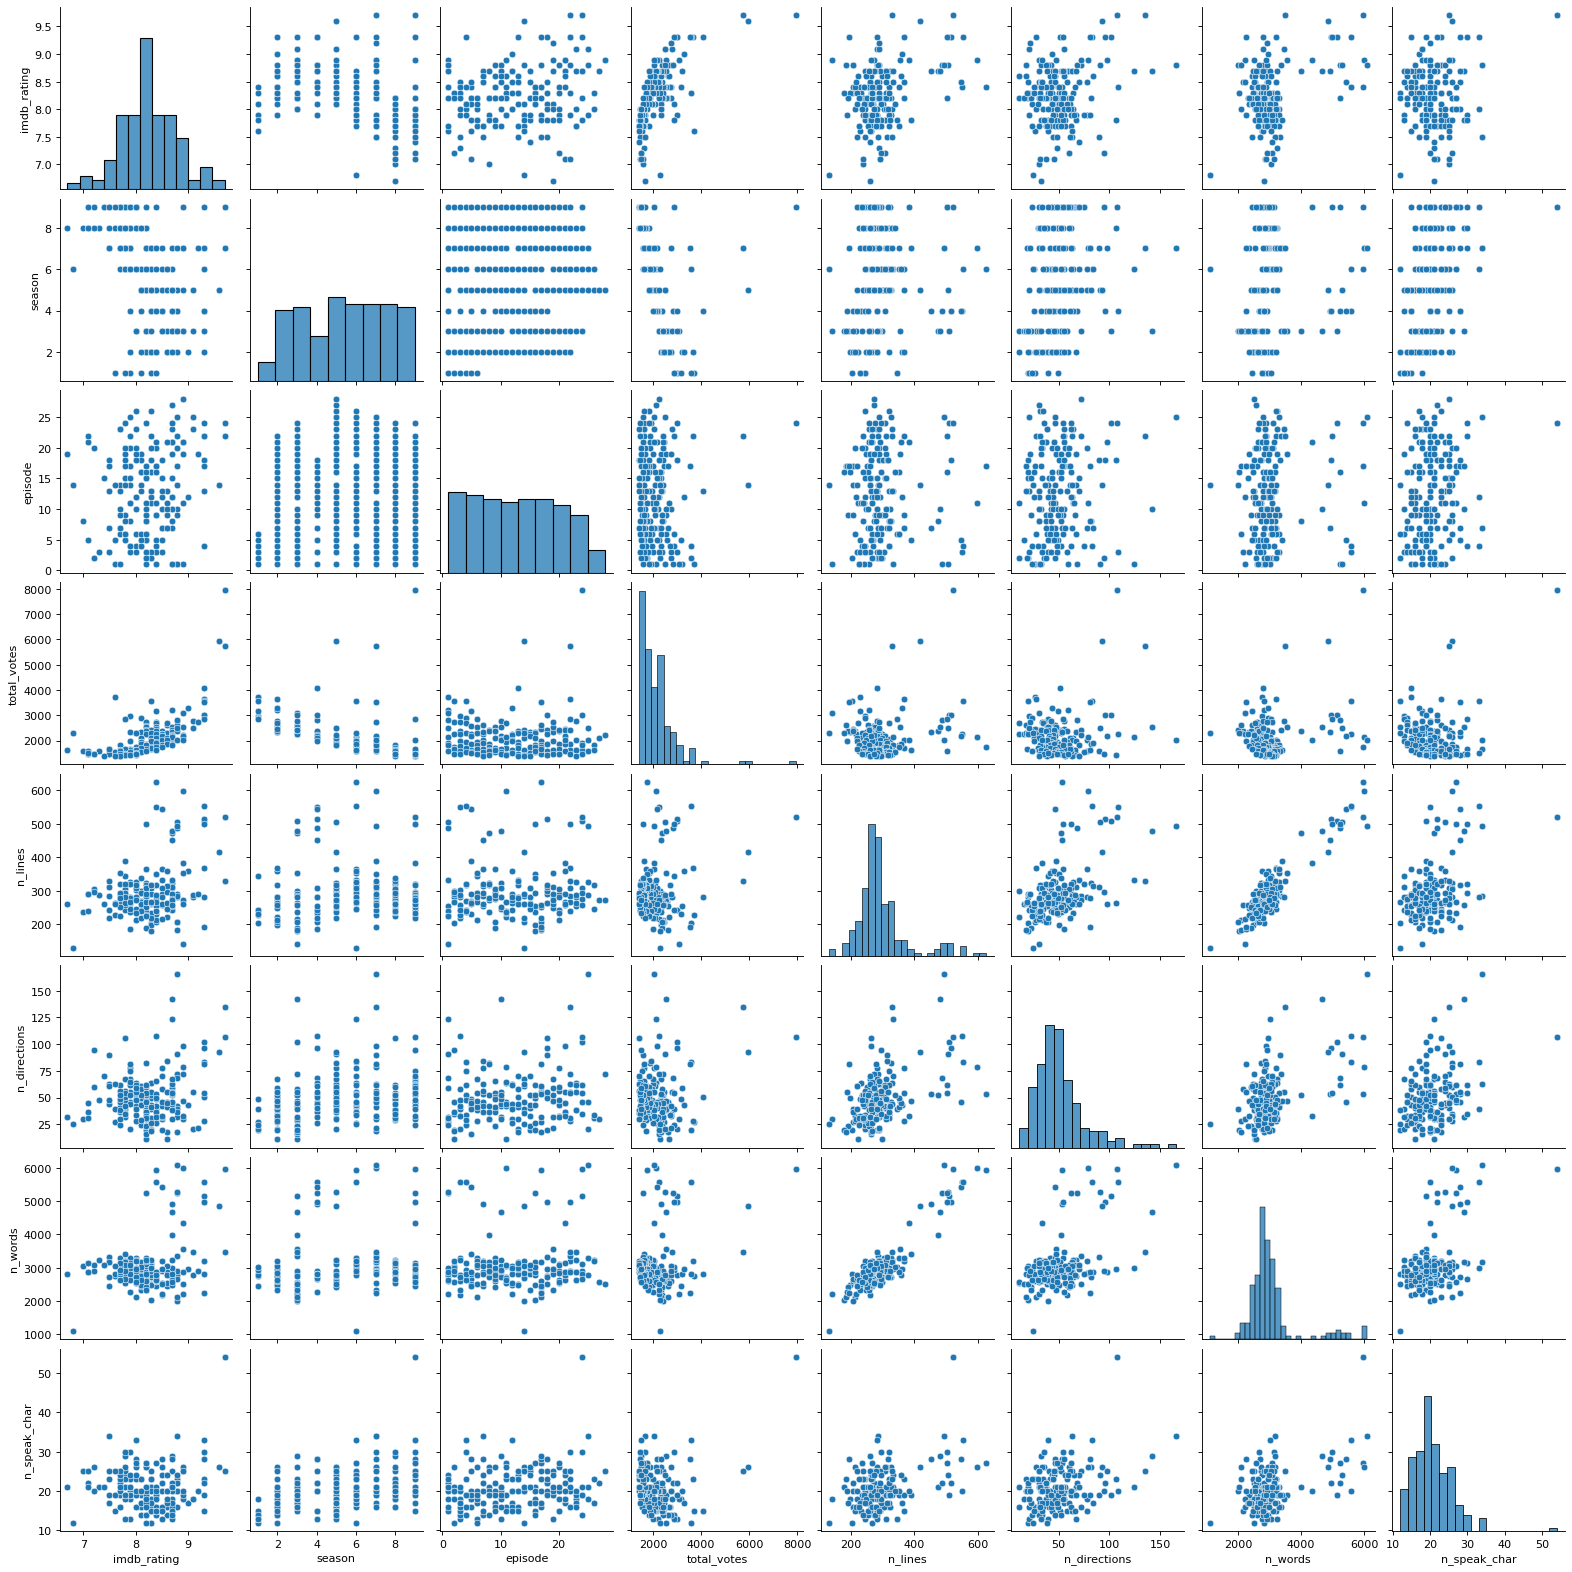

In [6]:
# Select the variables to plot
vars_to_plot = ["imdb_rating", 'season', 'episode', "total_votes", "n_lines", "n_directions", "n_words", "n_speak_char"]

# Create the scatter plot matrix
sns.pairplot(data[vars_to_plot])
plt.show()

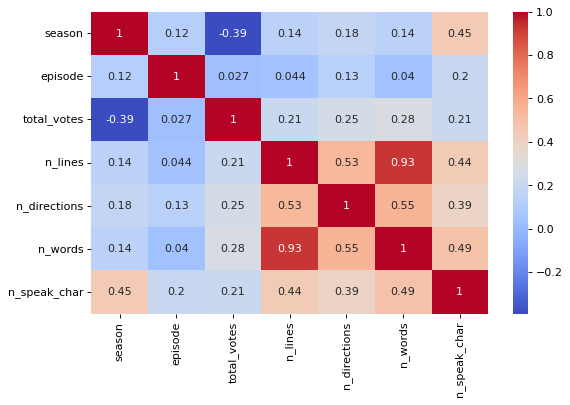

In [7]:
# Create a correlation matrix
corr_matrix = x_train.corr()

# Create the heatmap
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)
plt.show()

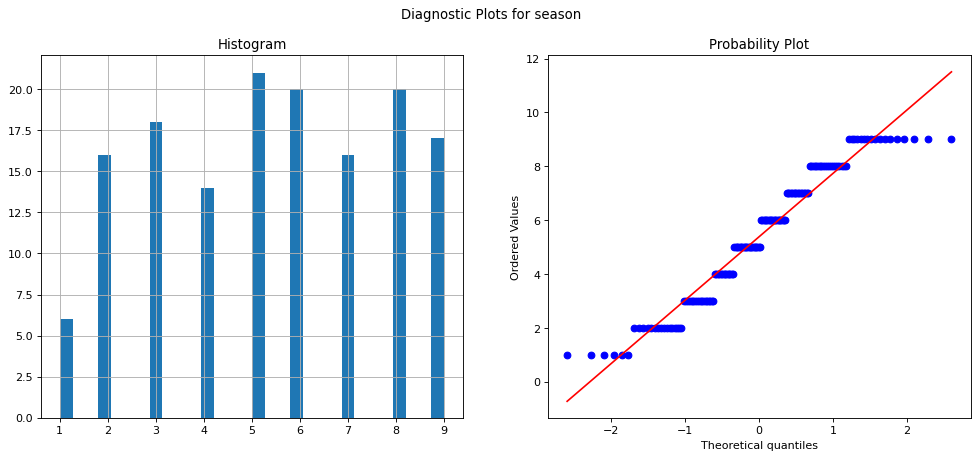

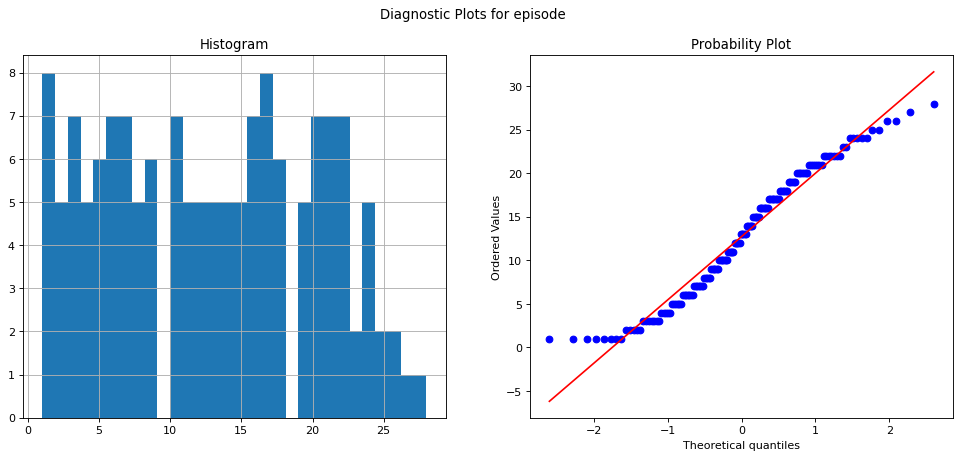

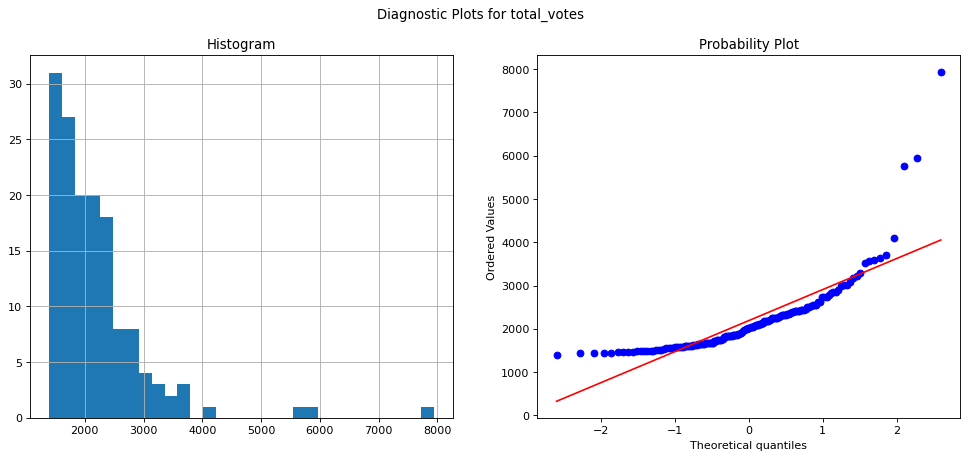

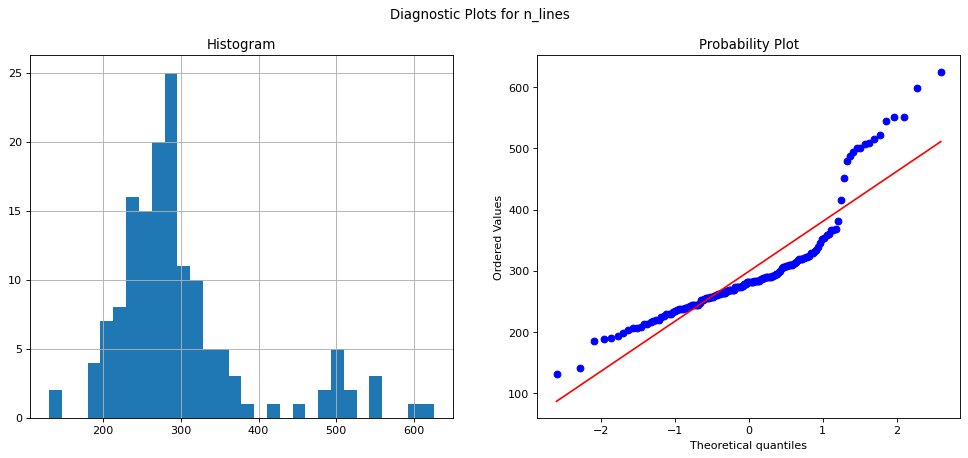

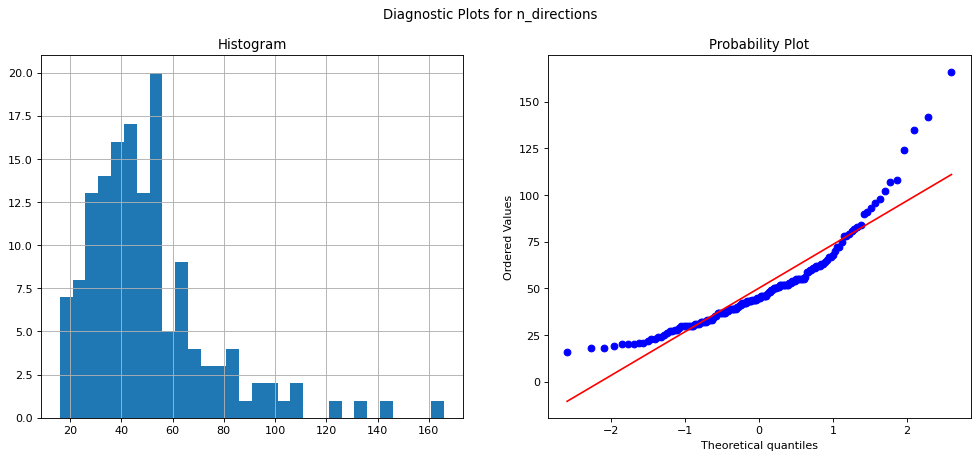

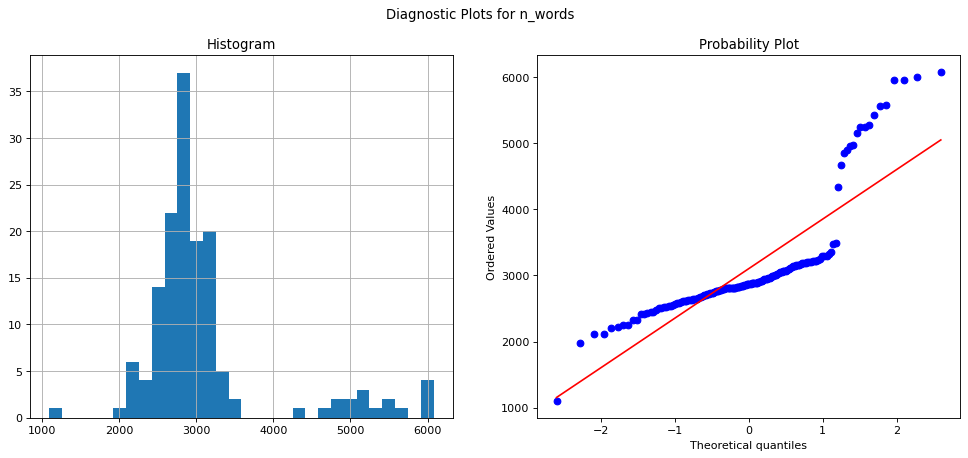

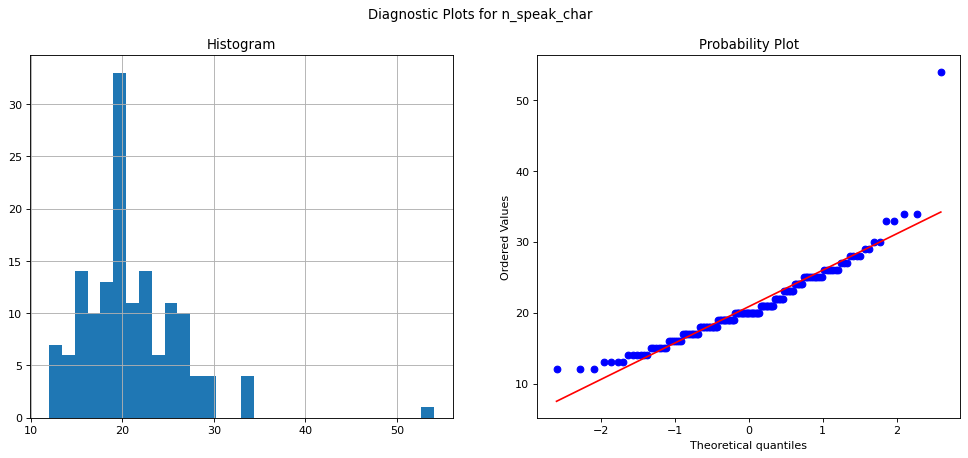

In [8]:
# Necessary module for the probability plot 
import scipy.stats as stats
# from Python Feature Engineering Cookbook
def diagnostic_plots(dataset, variable): 
    plt.figure(figsize=(15,6)) 
    plt.subplot(1, 2, 1) 
    dataset[variable].hist(bins=30)
    plt.title("Histogram")
    plt.subplot(1, 2, 2)
    stats.probplot(dataset[variable], dist="norm", plot=plt) 
    plt.suptitle("Diagnostic Plots for {}".format(variable))
    plt.show()
for variable_name in x_train.columns:
    diagnostic_plots(x_train, variable_name)

In [9]:
# Necessary module for the calculation of skewness
from scipy.stats import skew
# For loop to calculate skewness of each feature below
for i, variable_name in enumerate(x_train):
    skew_val = pd.DataFrame([skew(x_train[variable_name])], index = [variable_name], columns = ["skewness"])
 
    if i == 0:
        skew_data = skew_val.T
    else:
        skew_data = pd.concat([skew_data, skew_val.T], axis=1)
skew_data

,season,episode,total_votes,n_lines,n_directions,n_words,n_speak_char
skewness,-0.096877,0.057928,3.349108,1.61195,1.728021,1.939711,1.812365


In [10]:
# Check whether there is any missing values in the training data
x_train.isnull().sum()
# None of the columns have a null value so we do not need to deal with them

import pandas as pd
x_train = pd.DataFrame(x_train)
print(x_train.shape)

from feature_engine.selection import DropCorrelatedFeatures

fs = DropCorrelatedFeatures(variables = None,
                            method = 'pearson',
                            threshold = 0.6)

x_train_fs= fs.fit_transform(x_train)

print("Correlated Feature Groups")
print(fs.correlated_feature_sets_)
print("Dropped")
print(list(np.setdiff1d(list(x_train.columns), list(x_train_fs.columns))))
print(x_train_fs.shape)

(148, 7)
Correlated Feature Groups
[{'n_lines', 'n_words'}]
Dropped
['n_words']
(148, 6)


In [11]:
x_test = x_test.drop(['n_words'], axis=1)
x_test

,season,episode,total_votes,n_lines,n_directions,n_speak_char
113,6,25,1571,326,46,21
164,9,2,1477,296,95,20
169,9,7,1406,294,56,24
101,6,12,1981,265,26,23
100,6,11,1726,267,46,27
15,2,10,2755,283,42,20
177,9,15,1407,260,70,21
35,3,8,2376,474,52,21
119,7,5,1612,390,47,19
152,8,14,1432,290,36,21


## 3. Model Fitting and Tuning


*In this section you should detail your choice of model and describe the process used to refine and fit that model.*

- You are strongly encouraged to explore many different modeling methods (e.g. linear regression, regression trees, lasso, etc.) but you should not include a detailed narrative of all of these attempts. 
- At most this section should mention the methods explored and why they were rejected - most of your effort should go into describing the model you are using and your process for tuning and validatin it.

*For example if you considered a linear regression model, a classification tree, and a lasso model and ultimately settled on the linear regression approach then you should mention that other two approaches were tried but do not include any of the code or any in depth discussion of these models beyond why they were rejected. This section should then detail is the development of the linear regression model in terms of features used, interactions considered, and any additional tuning and validation which ultimately led to your final model.* 

**This section should also include the full implementation of your final model, including all necessary validation. As with figures, any included code must also be addressed in the text of the document.**

### 3.1  Regression Modeling

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg = LinearRegression()

def get_coefs(m):
    """Returns the model coefficients from a Scikit-learn model object as an array,
    includes the intercept if available.
    """
    
    # If pipeline, use the last step as the model
    if (isinstance(m, sklearn.pipeline.Pipeline)):
        m = m.steps[-1][1]
    
    
    if m.intercept_ is None:
        return m.coef_
    
    return np.concatenate([[m.intercept_], m.coef_])

def model_fit(m, X, y, plot = False):
    """Returns the mean squared error, root mean squared error and R^2 value of a fitted model based 
    on provided X and y values.
    
    Args:
        m: sklearn model object
        X: model matrix to use for prediction
        y: outcome vector to use to calculating rmse and residuals
        plot: boolean value, should fit plots be shown 
    """
    
    y_hat = m.predict(X)
    MSE = mean_squared_error(y, y_hat)
    RMSE = np.sqrt(mean_squared_error(y, y_hat))
    Rsqr = r2_score(y, y_hat)
    
    Metrics = (round(MSE, 4), round(RMSE, 4), round(Rsqr, 4))

    y = np.array(y).flatten()
    y_hat = y_hat.flatten()

    res = pd.DataFrame(
        data = {'y':y, 'y_hat': y_hat, 'resid': y - y_hat}
    )
    
    if plot:
        plt.figure(figsize=(12, 6))
        
        plt.subplot(121)
        sns.lineplot(x='y', y='y_hat', color="grey", data =  pd.DataFrame(data={'y': [min(y),max(y)], 'y_hat': [min(y),max(y)]}))
        sns.scatterplot(x='y', y='y_hat', data=res).set_title("Actual vs Fitted plot")
        
        plt.subplot(122)
        sns.scatterplot(x='y_hat', y='resid', data=res).set_title("Fitted vs Residual plot")
        plt.hlines(y=0, xmin=y.min(), xmax=y.max(), linestyles='dashed', alpha=0.3, colors="black")
        
        plt.subplots_adjust(left=0.0)
        
        plt.suptitle("Model (MSE, RMSE, Rsqr) = " + str(Metrics), fontsize=14)
        plt.show()
    
    return MSE, RMSE, Rsqr

In [13]:
reg.fit(x_train_fs, y_train)
print(x_train_fs.head())
X = np.array(x_train_fs)
y = y_train

linear_fit = reg.fit(
    # X must be a matrix so we need to reshape the column
    X = X, 
    y = y
)

beta_0 = linear_fit.intercept_  # Intercept term of the fitted model
beta_1 = linear_fit.coef_[0]   # Subsetting here returns a scalar value

beta = (beta_0, beta_1)
print(beta)

     season  episode  total_votes  n_lines  n_directions  n_speak_char
123       7        9         1598      307            51            26
135       7       22         5749      329           135            25
150       8       12         1612      273            62            20
31        3        4         2311      236            52            19
12        2        7         2631      254            46            14
(array([7.21094681]), array([-0.04369477,  0.01537272,  0.00033047,  0.00169391,  0.00237252,
       -0.01121954]))


In [14]:
y_pred = linear_fit.predict(X)

# The mean squared error of the training set 
print("Mean squared error: %.3f" % mean_squared_error(y_train, y_pred))
# The coefficient of determination of the training set 
print("Coefficient of determination: %.3f" % r2_score(y_train, y_pred))
# If we use the pre-defined function


Mean squared error: 0.139
Coefficient of determination: 0.550


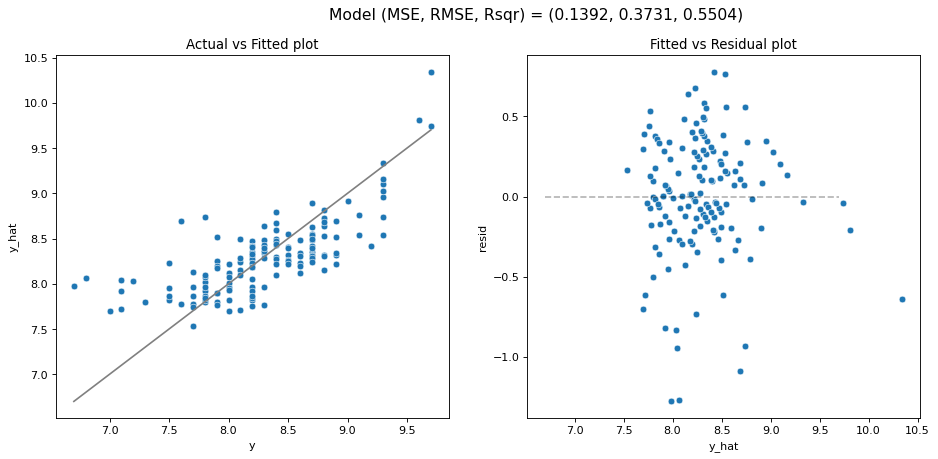

(0.13921776436177638, 0.3731189681077289, 0.5504496481672068)

In [97]:
y_hat = linear_fit.predict(X)
model_fit(linear_fit, X, y, plot = True)

In [15]:
X_test = np.array(x_test)
# For testing performance of the fitted new model
y_pred_test = linear_fit.predict(X_test)

# The mean squared error of the testing set 
print("Mean squared error: %.3f" % mean_squared_error(y_test, y_pred_test))
# The coefficient of determination of the testing set 
print("Coefficient of determination: %.3f" % r2_score(y_test, y_pred_test))

Mean squared error: 0.096
Coefficient of determination: 0.413


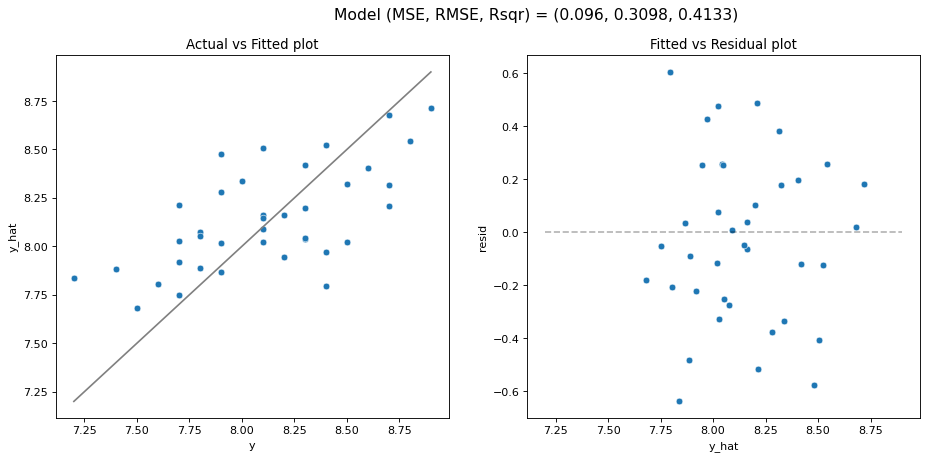

(0.09597644336751934, 0.30980065101209736, 0.41325154859145663)

In [16]:
# If we use the pre-defined function

model_fit(linear_fit, X_test, y_test, plot = True)

### 3.2 Classification tree

[7.8, 9.7, 8.0, 8.0, 8.6, 8.2, 8.8, 8.5, 8.0, 8.9, 8.3, 8.5, 8.8, 8.2, 7.9, 8.6, 7.9, 8.2, 8.8, 8.8, 8.1, 8.0, 8.2, 8.7, 7.1, 7.8, 8.2, 8.2, 8.2, 8.4, 8.0, 8.2, 8.0, 8.2, 7.9, 7.0, 8.7, 9.3, 7.7, 8.4, 8.2, 8.3, 9.2, 8.7, 7.8, 8.2, 8.2, 7.8, 7.6, 7.9, 8.2, 8.5, 8.2, 9.3, 8.5, 8.6, 8.9, 8.8, 8.1, 7.6, 8.4, 8.3, 8.8, 8.7, 8.2, 8.3, 8.6, 8.0, 8.7, 9.6, 8.0, 7.8, 8.7, 9.3, 7.3, 7.9, 8.7, 8.7, 8.0, 8.8, 8.2, 7.7, 8.4, 8.9, 7.7, 8.1, 8.1, 8.5, 7.8, 8.9, 7.1, 7.7, 9.1, 8.1, 8.5, 8.2, 7.9, 8.7, 8.4, 7.7, 7.8, 8.7, 8.4, 8.2, 9.3, 7.2, 7.5, 9.0, 8.6, 7.8, 8.9, 8.1, 7.8, 7.9, 8.7, 7.8, 9.3, 8.0, 8.7, 8.8, 8.3, 8.3, 8.3, 7.1, 9.3, 8.4, 8.7, 6.7, 7.7, 8.3, 8.4, 7.9, 9.3, 7.5, 6.8, 8.6, 8.3, 9.1, 8.4, 7.5, 9.7, 8.2, 8.2, 8.4, 8.4, 8.2, 7.5, 8.5]
['Low', 'High', 'Low', 'Low', 'High', 'Medium', 'High', 'High', 'Low', 'High', 'Medium', 'High', 'High', 'Medium', 'Low', 'High', 'Low', 'Medium', 'High', 'High', 'Low', 'Low', 'Medium', 'High', 'Low', 'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Me

'[classification_tree]' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


KeyError: 0

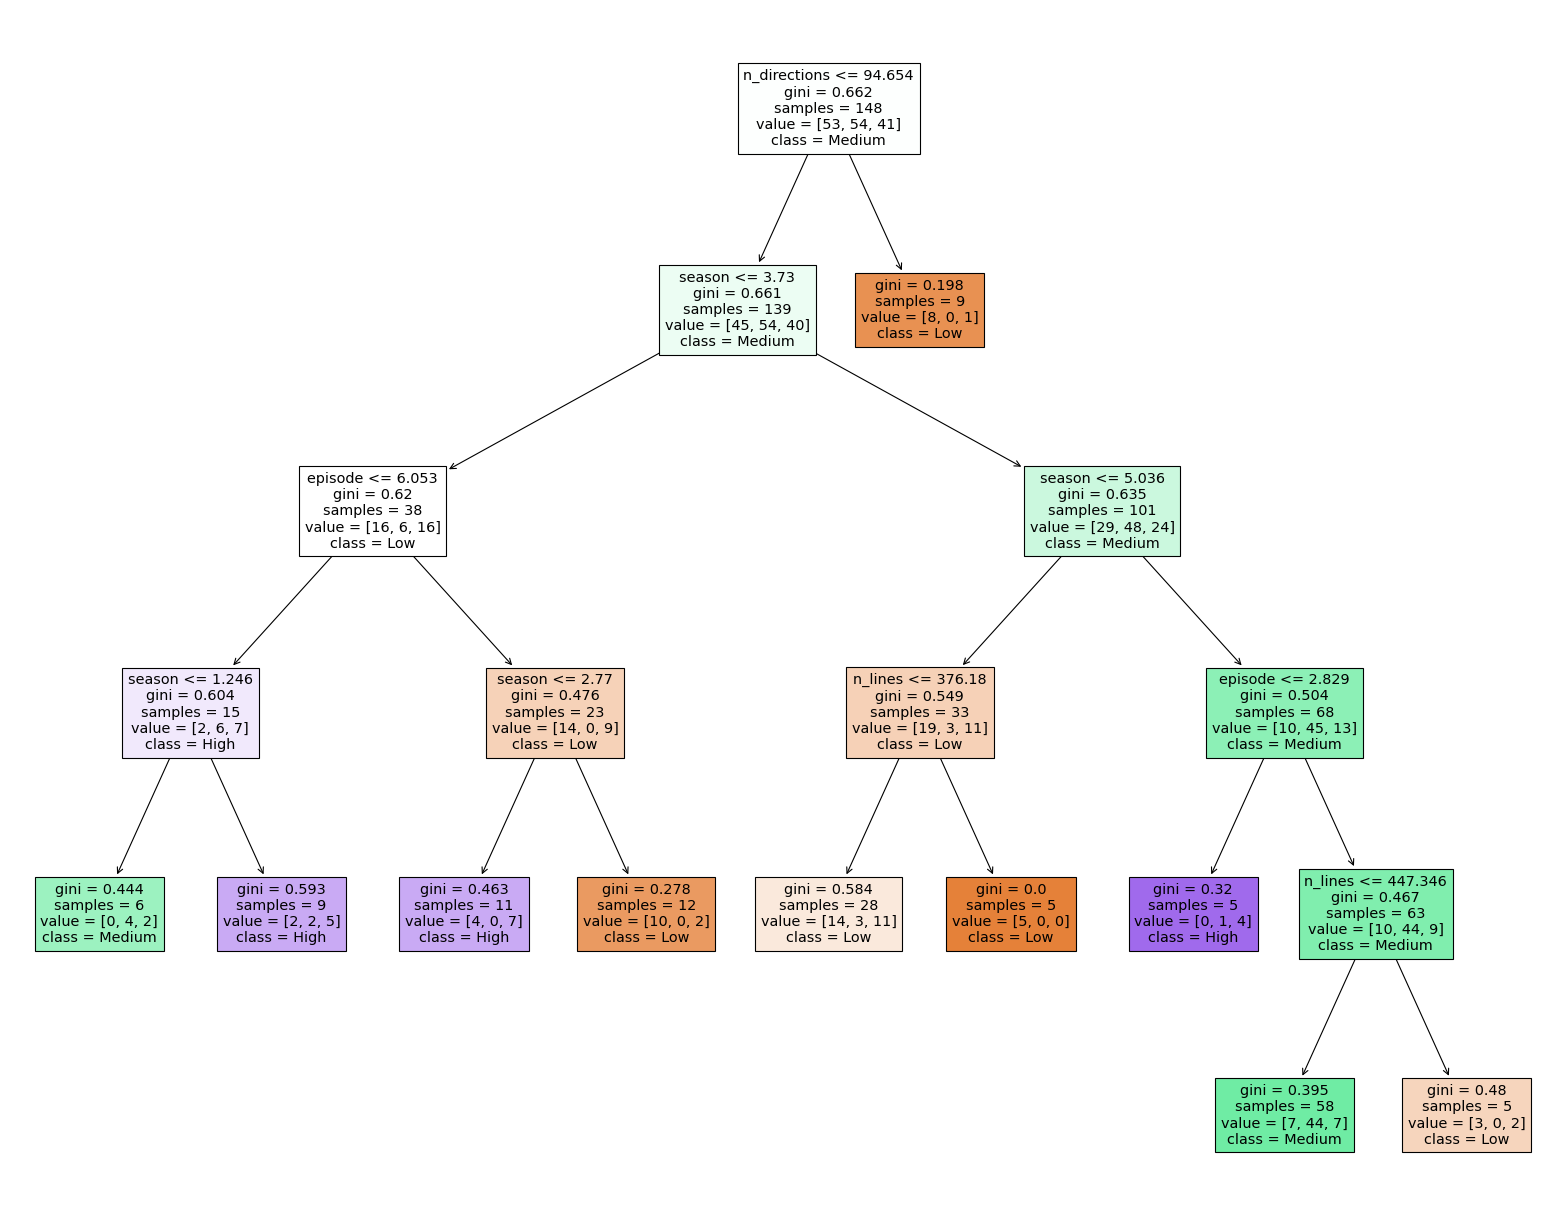

In [21]:
import sys
import matplotlib
matplotlib.use('Agg')

import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

y = y_train['imdb_rating']
y = y.tolist()
threshold_1=np.percentile(y_train,33)
threshold_2=np.percentile(y_train,66)

y_category=[]
for i in range(0,len(y)):
    if y[i] <= threshold_1:
        y_category.append("Low")
    elif y[i] >= threshold_2:
        y_category.append("High")
    else:
        y_category.append("Medium")
print(y)
print(y_category)

X = x_train.drop(['n_words'],axis=1)
features = ['season','episode','total_votes','n_lines','n_directions','n_speak_char']

dtree = DecisionTreeClassifier(criterion = "gini", splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 5)
dtree = dtree.fit(X,y_category)

#tree.plot_tree(dtree,feature_names=features)
#plt.savefig(sys.stdout.buffer)
#sys.stdout.flush()

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree,feature_names=features,class_names=["Low","Medium","High"],filled=True)
fig.savefig("decistion_tree.png")

<img src="./decistion_tree.png",width=320,heigth=240>

y = y_test
threshold_1=np.percentile(y,33)
threshold_2=np.percentile(y,66)

ytest=[]
for i in range(0,len(y)):
    if y[i] <= threshold_1:
        ytest.append("Low")
    elif y[i] >= threshold_2:
        ytest.append("High")
    else:
        ytest.append("Medium")
xtest=x_test.drop(['n_words'],axis=1)

# Calculate the correct classification score
score = dtree.score(xtest, ytest)
score

## 4. Discussion and Conclusions


*In this section you should provide a general overview of **your final model**, its **performance**, and **reliability**.* 

- You should discuss what the implications of your model are in terms of the included features, predictive performance, and anything else you think is relevant.

- This should be written with a target audience of a NBC Universal executive who is with the show and university level mathematics but not necessarily someone who has taken a postgraduate statistical modeling course. 

- Your goal should be to convince this audience that your model is both accurate and useful.

- Finally, you should include concrete recommendations on what NBC Universal should do to make their reunion episode a popular as possible.

**Keep in mind that a negative result, i.e. a model that does not work well predictively, but that is well explained and justified in terms of why it failed will likely receive higher marks than a model with strong predictive performance but with poor or incorrect explanations / justifications.**

## 5. References

*In this section, you should present a list of external sources (except the course materials) that you used during the project, if any*

- Additional data sources can be cited here, in addition to related python documentations, any other webpage sources that you benefited from